在[回归](3.回归.md)一文中谈到了梯度下降法，忘记的同学可以去回顾一下。

也推荐感兴趣的同学看看这个视频:

![Gradients and Paritial Derivatives](./Images/5/1.png)

**Gradients and Paritial Derivatives:** https://www.youtube.com/watch?v=GkB4vW16QHI

本节我们将学习梯度下降法中可以使用的几个技巧：

- Tuning your learning rates
- Stochastic Gradient Descent 
- Feature Scaling

可以使我们更加方便地训练模型。

## Tuning your learning rates

[回归](3.回归.md)一文中我们实现了梯度下降算法，主要代码如下所示：

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Codes/3/pokemon.csv")
data = df[['cp', 'cp_new']].values
test_size = 0.33
epsilon = 0.001


def compute_error(b, w, points):
    """
    计算平均损失
    """
    x = points[:, 0]
    y = points[:, 1]
    return np.mean((y - (w * x + b))**2)


def step_gradient(b, w, points, learning_rate):
    """
    计算新的w和b的值
    """
    x = points[:, 0]
    y = points[:, 1]
    error = y - (w * x + b)
    b_gradient = 2 * np.mean(error)
    w_gradient = 2 * np.mean(error * (-x))
    b_new = b - (learning_rate * b_gradient)
    w_new = w - (learning_rate * w_gradient)
    return b_new, w_new

文中我们将学习速率$\eta$的值设置为了0.00001，为什么要设置成这个值？别的值不行吗？为了探究一下这个问题，我们可以新增如下函数：

In [9]:
def train_with_learning_rate(learning_rate, epochs=200):
    history = []
    w = 0.0
    b = 0.0
    for i in range(epochs):
        train_data_ = data[:-int(0.1 * len(data))]
        train_error = compute_error(b, w, train_data_)
        history.append(train_error)
        if (train_error > epsilon):
            b, w = step_gradient(b, w, train_data_, learning_rate)
    return history

`train_with_learning_rate`函数允许我们设置不同的学习速率，并返回训练过程中的损失。例如：

In [11]:
train_with_learning_rate(0.00001)[:15]

[112861.39705882352,
 10437.800893442514,
 4832.378196271827,
 4525.609835538308,
 4508.825645914743,
 4507.911678125248,
 4507.866254138058,
 4507.868363769758,
 4507.873074865442,
 4507.87792838308,
 4507.882789744494,
 4507.887651584507,
 4507.892513500035,
 4507.8973754690205,
 4507.902237490254]

现在我们用3个不同的学习速率，看看效果有什么不同

In [53]:
l2 = 0.00001
l1 = 0.00005
l3 = l2 / 10

In [55]:
loss2 = train_with_learning_rate(l2)
loss1 = train_with_learning_rate(l1)
loss3 = train_with_learning_rate(l3)

In [56]:
print("loss2: \n", loss2[:15], "\n", loss2[-15:])
print("*" * 50)
print("loss1: \n", loss1[:15], "\n", loss1[-15:])
print("*" * 50)
print("loss3: \n", loss3[:15], "\n", loss3[-15:])

loss2: 
 [112861.39705882352, 10437.800893442514, 4832.378196271827, 4525.609835538308, 4508.825645914743, 4507.911678125248, 4507.866254138058, 4507.868363769758, 4507.873074865442, 4507.87792838308, 4507.882789744494, 4507.887651584507, 4507.892513500035, 4507.8973754690205, 4507.902237490254] 
 [4508.73441096409, 4508.739281968716, 4508.744153025619, 4508.7490241348005, 4508.75389529626, 4508.758766509999, 4508.763637776021, 4508.76850909432, 4508.773380464899, 4508.778251887761, 4508.783123362906, 4508.787994890334, 4508.792866470041, 4508.7977381020355, 4508.802609786311]
**************************************************
loss1: 
 [112861.39705882352, 872484.9233602845, 6957525.071130448, 55702348.296565615, 446177635.3691414, 3574119020.3958325, 28630806684.24469, 229349912129.3922, 1837230404204.8428, 14717318082273.627, 117894550104413.42, 944406098304267.4, 7565259613362086.0, 6.060226963860344e+16, 4.854605490160453e+17] 
 [1.632593483367345e+172, 1.3078053569312577e+173, 1.0

将不同学习速率的训练误差绘制成图

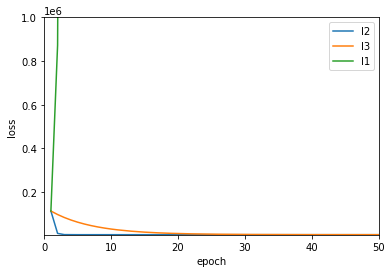

In [57]:
x = np.arange(200) + 1

plt.plot(x, loss2, label='l2')
plt.plot(x, loss3, label='l3')
plt.plot(x, loss1, label='l1')

plt.ylim([4000, 1e6])
plt.xlim([0, 50])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

从上图可以看到不同的学习速率会使损失的下降速度不同。

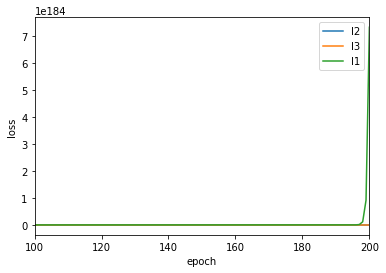

In [62]:
plt.plot(x, loss2, label='l2')
plt.plot(x, loss3, label='l3')
plt.plot(x, loss1, label='l1')

plt.xlim([100, 200])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

由此，我们知道必须要小心设置学习速率$\eta$的值,

![](./Images/5/2.png)

如果学习速率过小的话，损失的下降的速度非常慢；如果学习速率过大的话，可能会造成损失最后不降反增。

这样如果靠我们自己去设置速率的话，就显得很麻烦了，毕竟一开始我们怎么知道学习速率是大还是小。

这个时候，我们就可以考虑 **Adaptive Learning Rates**:

![](./Images/5/3.png)

正如上图所说的，我们不光可以根据当前训练的轮次（epoch）调整学习速率，还可以给不同的参数设置不同的学习速率。

**Adagrad**就是一种实现上述想法的梯度下降优化算法。

![](./Images/5/4.png)


具体来说，整个过程如下所示：

![](./Images/5/5.png)

由于$\eta^t$和$\sigma^t$两项都包含$t+1$，我们可以对公式进一步化简。

![](./Images/5/7.png)

我们对上式的右边部分做进一步的整理：

$$
\frac{g^t}{\sqrt{\sum_{i=0}^{t}{\left( g^i\right)^2}}} = \frac{1}{\sqrt{\frac{\sum_{i=0}^{t-1}{\left( g^i\right)^2}}{g^t} + 1}} 
$$

$\frac{\sum_{i=0}^{t-1}{\left( g^i\right)^2}}{g^t}$ 可以看成当前梯度平方与之前梯度平方累加和的反差。如果当前梯度平方突然变得很大，而之前的梯度平方都比较小的话，二者的相除会让整个式子变小，
$$\frac{1}{\sqrt{\frac{\sum_{i=0}^{t-1}{\left( g^i\right)^2}}{g^t} + 1}}$$式变大，参数更新加大力度，符合我们的直观想法。

反之，如果当前梯度平方突然变得很小，而之前的梯度平方都比较大的话，二者的相除会让整个式子变大，
$$\frac{1}{\sqrt{\frac{\sum_{i=0}^{t-1}{\left( g^i\right)^2}}{g^t} + 1}}$$式变小，参数更新减小力度，也符合我们的直观想法。

![](./Images/5/8.png)

## Stochastic Gradient Descent

之前我们计算训练损失的时候将所有训练样本的损失相加，如果训练集中的样本量非常大的话，可能会导致耗时非常大或者内存不够等情况。

这个时候我们可以考虑使用 **Stochastic Graident Descent**法：

![](./Images/5/9.png)

如上图所示，我们计算训练损失时不再计算整个训练集的损失，而是从训练集选一个样本计算损失再更新参数。

![](./Images/5/10.png)

## Feature Scaling

最后一个技巧就是 **Feature Scaling**。

![](./Images/5/11.png)

将特征进行缩放，所有的特征都将在类似的尺度下，可以加速训练过程。

![](./Images/5/12.png)

那么具体该怎么做呢？如下图所示：

![](./Images/5/13.png)

$x^r$表示样本，$x^r_i$表示样本的第i个特征，$m_i$表示第i个特征的均值，$\sigma_i$表示第i个特征的标准差。

以宝可梦数据为例：

In [65]:
df.head()

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,NaN


In [66]:
train_data = df[['cp', 'hp', 'weight', 'height']]

In [68]:
train_data

,cp,hp,weight,height
0,384,56,2.31,0.34
1,366,54,1.67,0.29
2,353,55,1.94,0.30
3,338,51,1.73,0.31
4,242,45,1.44,0.27
...,...,...,...,...
70,500,64,5.11,0.26
71,606,74,10.42,0.38
72,548,66,6.87,0.32
73,528,66,7.43,0.31


In [69]:
train_data.mean()

cp        197.173333
hp         40.693333
weight      2.750000
height      0.301733
dtype: float64

In [70]:
train_data.std()

cp        144.401128
hp         15.583232
weight      1.612898
height      0.035806
dtype: float64

In [71]:
(train_data - train_data.mean()) / train_data.std()

,cp,hp,weight,height
0,1.293803,0.982252,-0.272801,1.068714
1,1.169151,0.853909,-0.669602,-0.327689
2,1.079124,0.918081,-0.502202,-0.048409
3,0.975246,0.661395,-0.632402,0.230872
4,0.310432,0.276365,-0.812203,-0.886250
...,...,...,...,...
70,2.097121,1.495625,1.463205,-1.165531
71,2.831187,2.137340,4.755415,2.185836
72,2.429529,1.623968,2.554408,0.510153
73,2.291026,1.623968,2.901609,0.230872


最后，如果你比较喜欢视频的话，推荐瞅瞅来自[StatQuest with Josh Starmer](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw)频道的以下两个视频：

[Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)

[Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI)

觉得视频不错的话，就订阅一下呗！

## 推荐阅读

[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/index.html)

[CSC321 Lecture 7: Optimization](http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/slides/lec7.pdf)

![](./Images/5/14.png)

[Why Gradient descent isn’t enough: A comprehensive introduction to optimization algorithms in neural networks](https://towardsdatascience.com/why-gradient-descent-isnt-enough-a-comprehensive-introduction-to-optimization-algorithms-in-59670fd5c096)
